In [ ]:

# Uncomment the following line if you haven't installed these packages
# !pip install networkx matplotlib


In [1]:

import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add flight routes: (source, destination, weight)
routes = [
    ("New York", "Chicago", 150),
    ("Chicago", "Denver", 180),
    ("New York", "Denver", 400),
    ("Denver", "San Francisco", 200),
    ("Chicago", "San Francisco", 220),
    ("New York", "San Francisco", 500),
    ("San Francisco", "Los Angeles", 80),
    ("Denver", "Los Angeles", 120),
]

# Add weighted edges
G.add_weighted_edges_from(routes)


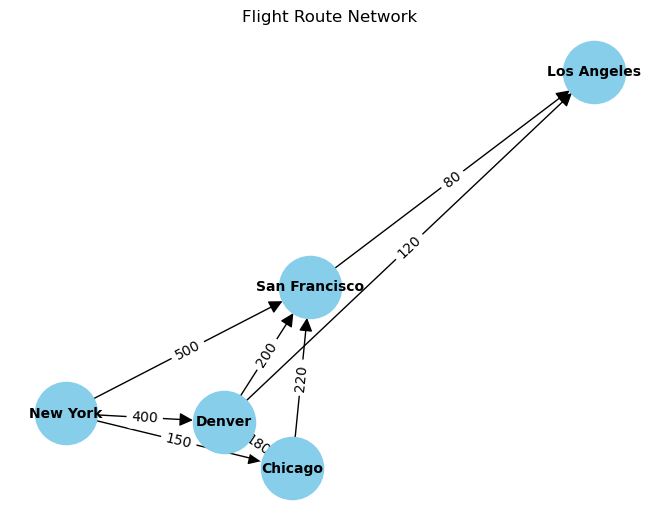

In [3]:

import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Flight Route Network")
plt.show()


In [5]:

source = "New York"
destination = "Los Angeles"

shortest_path = nx.shortest_path(G, source=source, target=destination)
print("Shortest path (fewest stops):", shortest_path)


Shortest path (fewest stops): ['New York', 'San Francisco', 'Los Angeles']


In [7]:

cheapest_path = nx.dijkstra_path(G, source=source, target=destination, weight='weight')
cheapest_cost = nx.dijkstra_path_length(G, source=source, target=destination, weight='weight')

print("Cheapest path:", cheapest_path)
print("Total cost:", cheapest_cost)


Cheapest path: ['New York', 'Chicago', 'Denver', 'Los Angeles']
Total cost: 450


In [9]:

def find_cheapest_path(graph, src, dst):
    try:
        path = nx.dijkstra_path(graph, source=src, target=dst, weight='weight')
        cost = nx.dijkstra_path_length(graph, source=src, target=dst, weight='weight')
        return path, cost
    except nx.NetworkXNoPath:
        return None, float('inf')

route, price = find_cheapest_path(G, "New York", "Tokyo")
if route:
    print("Route found:", route, "with cost:", price)
else:
    print("No route available")


No route available
